In [2]:
import numpy as np
import matplotlib.pyplot as plt
from wNMF import wNMF

# Mock setup: Sum of signals

In [70]:
## An example on simulated data
n=101
features = 100
components = 4

shapes_true = np.array([1 + np.sin(np.arange(features) / 10 / 2**i + np.random.uniform(0, np.pi)) for i in range(components)])
shapes_true[0] = 1
shapes_true[1] = np.exp(-np.arange(features) / 40)



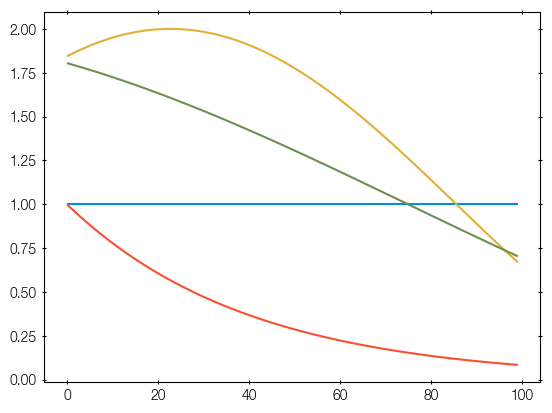

In [71]:
plt.plot(shapes_true.T);

## Generate mock data

In [56]:
X = np.random.normal(100 * np.random.uniform(size=(n, components)) @ shapes_true, 1)
W = np.ones_like(X)

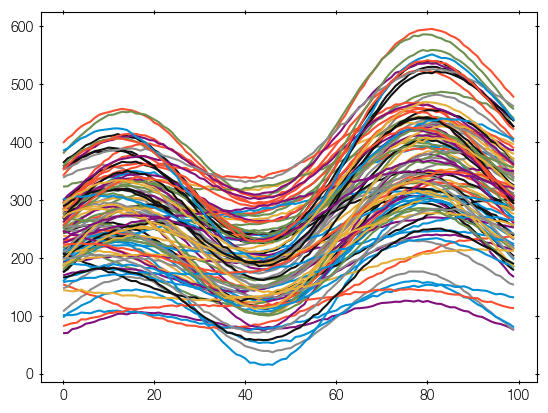

In [57]:
plt.plot(X.T);

## Use wNMF to recover intrinsic shapes

In [58]:
model = wNMF(n_components=components,beta_loss='frobenius',max_iter=1000,track_error=True,verbose=1)
fit = model.fit(X=X,W=W,n_run=5)

Beginning Run 1...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 2...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 3...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 4...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 5...
|--- Initializing U,V
|--- Running wNMF
|--- Completed


In [59]:
fit.V.shape, fit.U.shape

((4, 100), (101, 4))

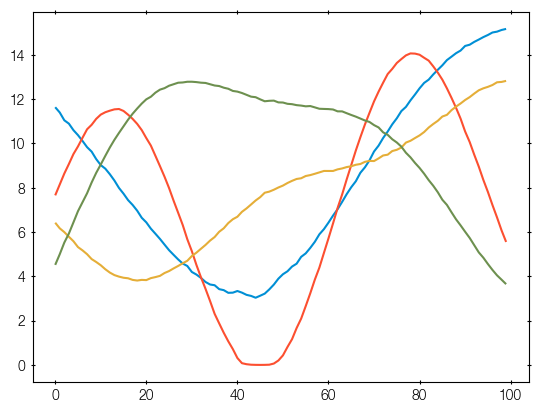

In [61]:
plt.plot(fit.V.T);

In [62]:
print(fit.V)

[[1.16356833e+01 1.13961414e+01 1.10453557e+01 1.08946317e+01
  1.06003756e+01 1.03753395e+01 1.01117235e+01 9.83163842e+00
  9.62997909e+00 9.29330037e+00 9.02313880e+00 8.86180865e+00
  8.60975465e+00 8.32522765e+00 7.99112851e+00 7.73266382e+00
  7.44130441e+00 7.22355731e+00 6.96411670e+00 6.64381733e+00
  6.43761912e+00 6.15376153e+00 5.92390517e+00 5.68969632e+00
  5.43381144e+00 5.18105138e+00 4.96990045e+00 4.76282196e+00
  4.57864270e+00 4.46883917e+00 4.19829058e+00 4.08154057e+00
  3.92941365e+00 3.74690640e+00 3.63229788e+00 3.59977129e+00
  3.42286589e+00 3.37768274e+00 3.25713754e+00 3.26464008e+00
  3.33888690e+00 3.26541689e+00 3.16578310e+00 3.11751020e+00
  3.03559200e+00 3.12555021e+00 3.22033186e+00 3.41095274e+00
  3.62855824e+00 3.89572394e+00 4.09585483e+00 4.22996168e+00
  4.44313583e+00 4.57221148e+00 4.88085320e+00 5.03791136e+00
  5.28469989e+00 5.55920087e+00 5.89913215e+00 6.13209856e+00
  6.42710435e+00 6.74364319e+00 7.03180356e+00 7.36379696e+00
  7.7133

In [63]:
print(fit.U)

[[6.96761541e+00 2.62632704e+00 1.55789852e+01 1.18126610e+01]
 [7.68420096e+00 7.32249981e+00 1.03773888e+01 1.99105530e+00]
 [8.74030384e+00 8.04547302e+00 1.04055395e+01 1.89911550e+00]
 [1.06512820e+01 6.52909834e+00 1.56205627e+01 1.08119477e+01]
 [9.30465561e+00 1.27522045e+01 3.94928193e+00 1.01804068e+01]
 [2.60722864e+00 7.23569170e+00 6.56974021e+00 1.11329399e+01]
 [9.24669742e+00 8.83415166e+00 7.77715891e+00 9.26287117e+00]
 [7.32035614e+00 9.45445090e+00 3.56501100e+00 1.55786715e+01]
 [1.43055895e+01 1.28549039e+01 1.06115398e+01 1.42116346e+01]
 [6.24512234e+00 5.78285163e+00 8.84724492e+00 9.77184260e+00]
 [8.61608795e+00 5.23638475e+00 1.16156612e+01 8.59912686e-01]
 [3.78706298e+00 1.22402665e+01 2.55388076e-01 9.54424196e+00]
 [1.35400844e+01 1.35861472e+01 8.10636106e+00 1.07564910e+01]
 [7.16252333e+00 1.30033346e+01 1.04200754e+01 6.39537496e+00]
 [6.33433387e+00 9.28411413e+00 5.66025771e+00 5.53316221e+00]
 [6.72157068e+00 8.48209821e+00 1.00307967e+01 4.693901

In [65]:
len(fit.error_tracker)

5

## Reconstruction error

In [66]:
print(fit.err)

11639.913470753248


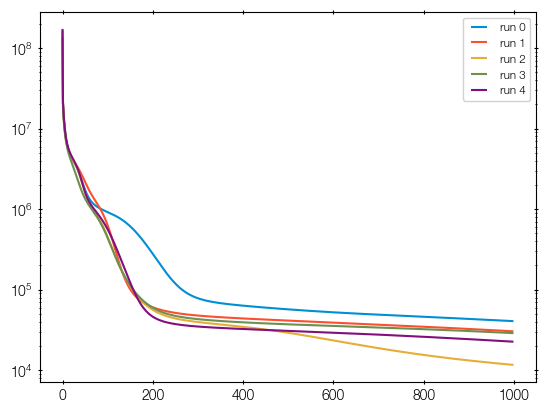

In [67]:
for i, err_tracked in enumerate(fit.error_tracker):
    plt.plot(err_tracked, label=f'run {i}');
plt.yscale('log')
plt.legend();